<a href="https://colab.research.google.com/github/ppavank83/Loan-Eligibility-Prediction/blob/main/Step_Presentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Eligibility Prediction

## 1.Problem Statement

# A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. These details are:

1. Gender

2. Marital Status

3. Education

4. Number of dependant

5. Income

6. Loan amount

7. Credit history

8. Self-employed

9. Applicant Income

10. Coapplicant Income

## Data

## Understand the Data

In [ ]:
# Importing pandas for data manipulation
import pandas as pd
# Importing numpy for numerical operation
import numpy as np
# Importing matplotlib for plotting
import matplotlib.pyplot as plt
# Importing seaborn for statistical data visualization
import seaborn as sns

In [ ]:
# Importing the dataset
url = 'https://drive.google.com/file/d/1FzPWlJinDMCm4BMn2uY6uiA4fIA1TY4f/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
# Reading the loan approval dataset from a CSV file
df = pd.read_csv(url, low_memory=False)
print("Import successful")

Import successful


In [ ]:
# Displaying the first 10 rows of the DataFrame
df.head(10)

loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   
5        6                  0       Graduate            Yes        4800000   
6        7                  5       Graduate             No        8700000   
7        8                  2       Graduate            Yes        5700000   
8        9                  0       Graduate            Yes         800000   
9       10                  5   Not Graduate             No        1100000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   
5      13500000          10           319                    6800000   
6      33000000           4           678                   22500000   
7      15000000          20           382                   13200000   
8       2200000          20           782                    1300000   
9       4300000          10           388                    3200000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  17600000              22700000            8000000   
1                   2200000               8800000            3300000   
2                   4500000              33300000           12800000   
3                   3300000              23300000            7900000   
4                   8200000              29400000            5000000   
5                   8300000              13700000            5100000   
6                  14800000              29200000            4300000   
7                   5700000              11800000            6000000   
8                    800000               2800000             600000   
9                   1400000               3300000            1600000   

   loan_status  
0     Approved  
1     Rejected  
2     Rejected  
3     Rejected  
4     Rejected  
5     Rejected  
6     Approved  
7     Rejected  
8     Approved  
9     Rejected

## Inspect the dataset

In [ ]:
# Displaying the dimensions of the DataFrame (number of rows and columns)
df.shape

(4269, 13)

In [ ]:
# Displaying the data types of each column in the DataFrame
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [ ]:
# Displaying summary statistics for numerical columns in the DataFrame
df.describe()

loan_id   no_of_dependents   income_annum   loan_amount  \
count  4269.000000        4269.000000   4.269000e+03  4.269000e+03   
mean   2135.000000           2.498712   5.059124e+06  1.513345e+07   
std    1232.498479           1.695910   2.806840e+06  9.043363e+06   
min       1.000000           0.000000   2.000000e+05  3.000000e+05   
25%    1068.000000           1.000000   2.700000e+06  7.700000e+06   
50%    2135.000000           3.000000   5.100000e+06  1.450000e+07   
75%    3202.000000           4.000000   7.500000e+06  2.150000e+07   
max    4269.000000           5.000000   9.900000e+06  3.950000e+07   

         loan_term   cibil_score   residential_assets_value  \
count  4269.000000   4269.000000               4.269000e+03   
mean     10.900445    599.936051               7.472617e+06   
std       5.709187    172.430401               6.503637e+06   
min       2.000000    300.000000              -1.000000e+05   
25%       6.000000    453.000000               2.200000e+06   
50%      10.000000    600.000000               5.600000e+06   
75%      16.000000    748.000000               1.130000e+07   
max      20.000000    900.000000               2.910000e+07   

        commercial_assets_value   luxury_assets_value   bank_asset_value  
count              4.269000e+03          4.269000e+03       4.269000e+03  
mean               4.973155e+06          1.512631e+07       4.976692e+06  
std                4.388966e+06          9.103754e+06       3.250185e+06  
min                0.000000e+00          3.000000e+05       0.000000e+00  
25%                1.300000e+06          7.500000e+06       2.300000e+06  
50%                3.700000e+06          1.460000e+07       4.600000e+06  
75%                7.600000e+06          2.170000e+07       7.100000e+06  
max                1.940000e+07          3.920000e+07       1.470000e+07

In [ ]:
# Dropping the 'Loan_id' column from the DataFrame
df = df.drop(['loan_id'],axis=1)

In [ ]:
# Displaying a summary of the DataFrame, including non-null entries and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


## 2.2 Data Cleaning

# Handling Null Values

In [ ]:
# Displaying the number of missing values in each column
df.isnull().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
# Displaying the number of duplicate rows in the DataFrame
df.isna().sum()

 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

## Duplicates

In [ ]:
# Displaying the number of duplicate rows in the DataFrame
df.duplicated().sum()

0

## Categorical data

In [ ]:
# Removing leading and trailing whitespaces from column names in the DataFrame
df.columns = [col.strip() for col in df.columns]

In [ ]:
# Renaming the 'education' column to 'education_Graduate'
df = df.rename(columns={'education': 'education_Graduate'})

In [ ]:
# Replacing categorical values with numerical ones in specific columns
df['education_Graduate'] = df['education_Graduate'].replace({' Graduate': 1, ' Not Graduate': 0})
df['loan_status'] = df['loan_status'].replace({' Approved': 1, ' Rejected': 0})
df['self_employed'] = df['self_employed'].replace({' Yes': 1, ' No': 0})

In [ ]:
# Displaying the data types of each column in the DataFrame
df.dtypes

no_of_dependents            int64
education_Graduate          int64
self_employed               int64
income_annum                int64
loan_amount                 int64
loan_term                   int64
cibil_score                 int64
residential_assets_value    int64
commercial_assets_value     int64
luxury_assets_value         int64
bank_asset_value            int64
loan_status                 int64
dtype: object

## Univariate Analysis

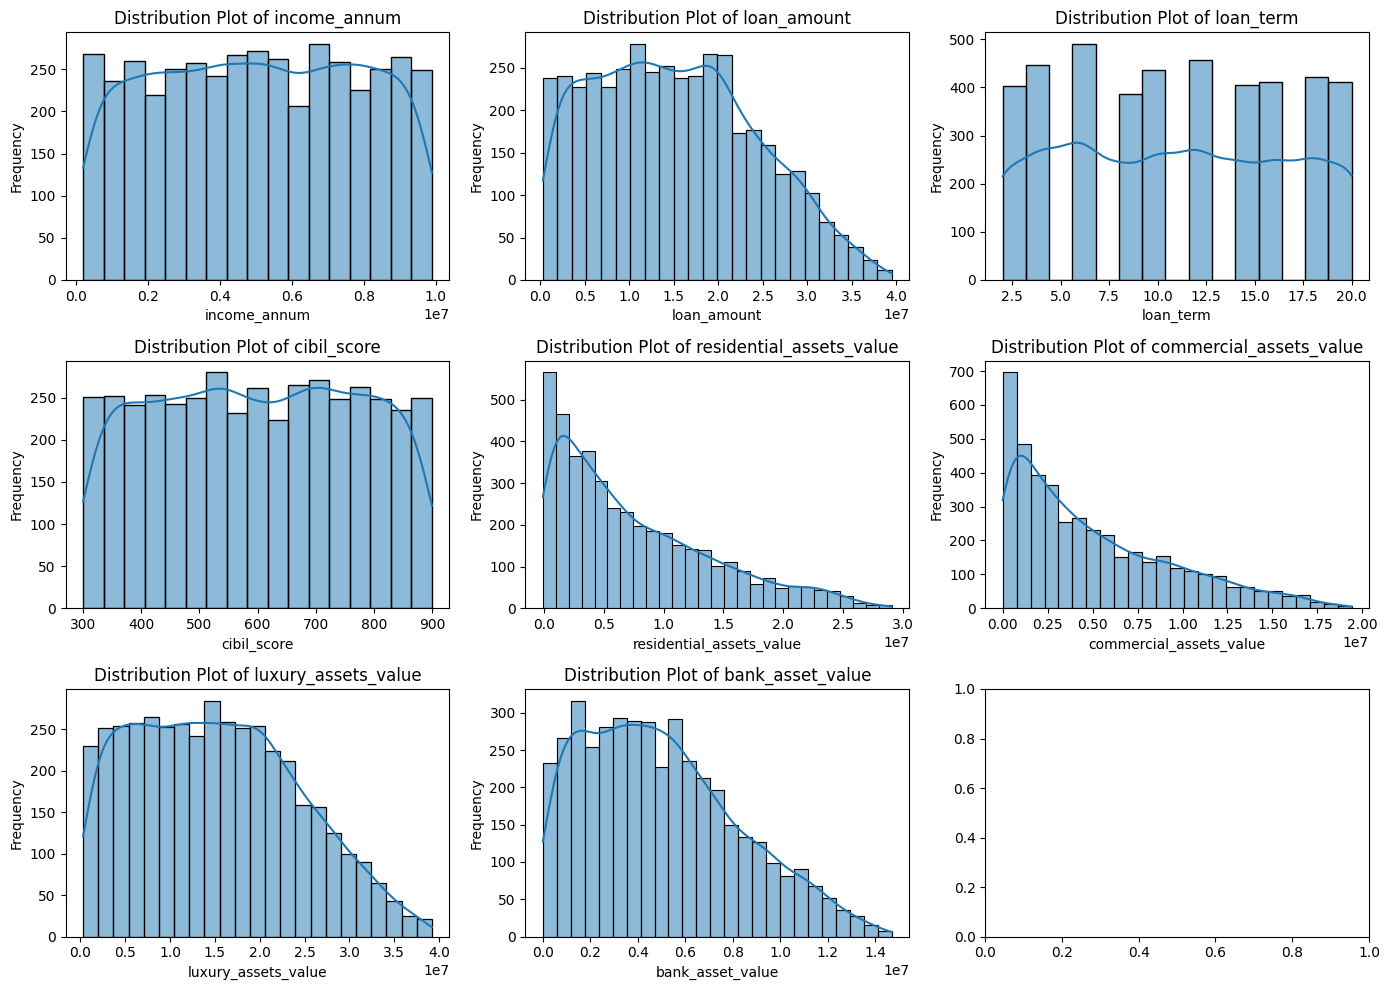

In [ ]:
# Importing warnings library to suppress warnings
import warnings
warnings.filterwarnings("ignore")
# Specifying columns for plotting distribution plots
columns = ['income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value',
           'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
# Creating subplots for distribution plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
axes = axes.flatten()
# Iterating over columns and plotting distribution plots
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i], edgecolor='black')
    axes[i].set_title(f'Distribution Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

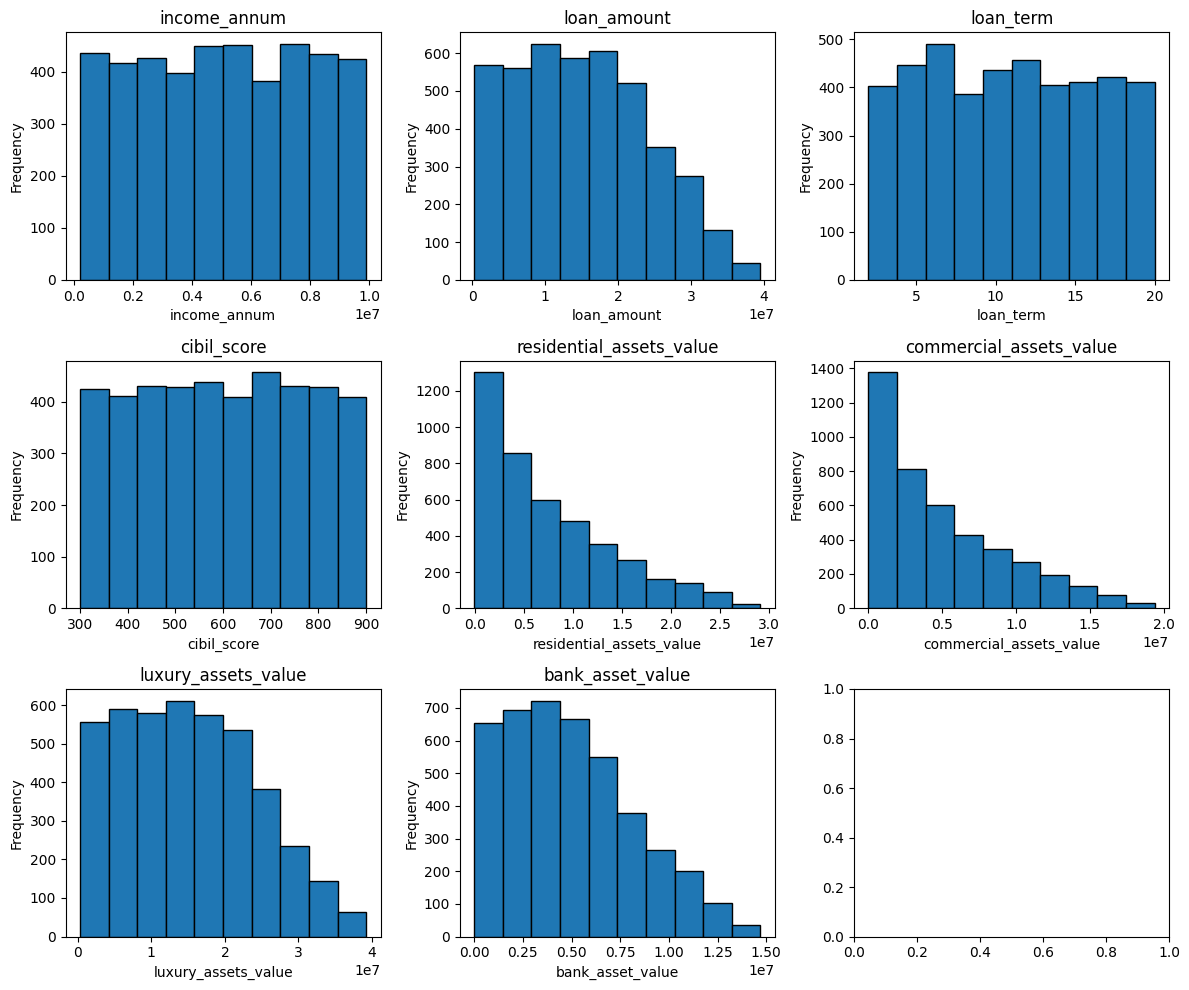

In [ ]:
#columns = df.columns
# Specifying columns for plotting histograms
columns = [ 'income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value',
           'commercial_assets_value','luxury_assets_value', 'bank_asset_value']
# Creating subplots for histograms
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))
axes = axes.flatten()
# Iterating over columns and plotting histograms
for i, col in enumerate(columns):
    axes[i].hist(df[col], bins=10, edgecolor='black')
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

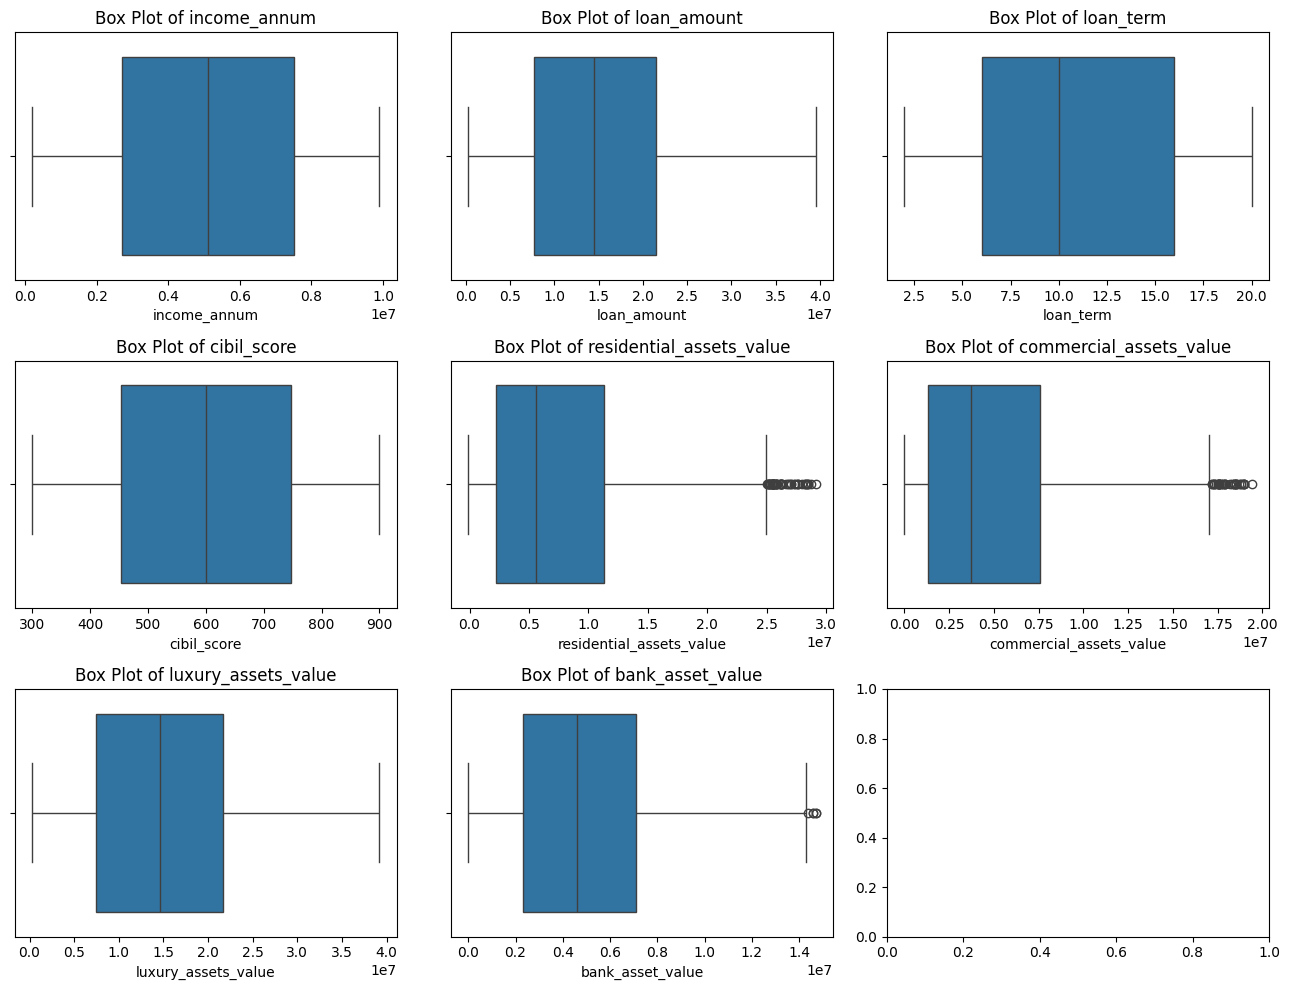

In [ ]:
# Specifying columns for plotting box plots
columns = ['income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value', 'commercial_assets_value',
           'luxury_assets_value', 'bank_asset_value']
# Creating subplots for box plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13,10))
axes = axes.flatten()
# Iterating over columns and plotting box plots
for i, col in enumerate(columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('')
# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

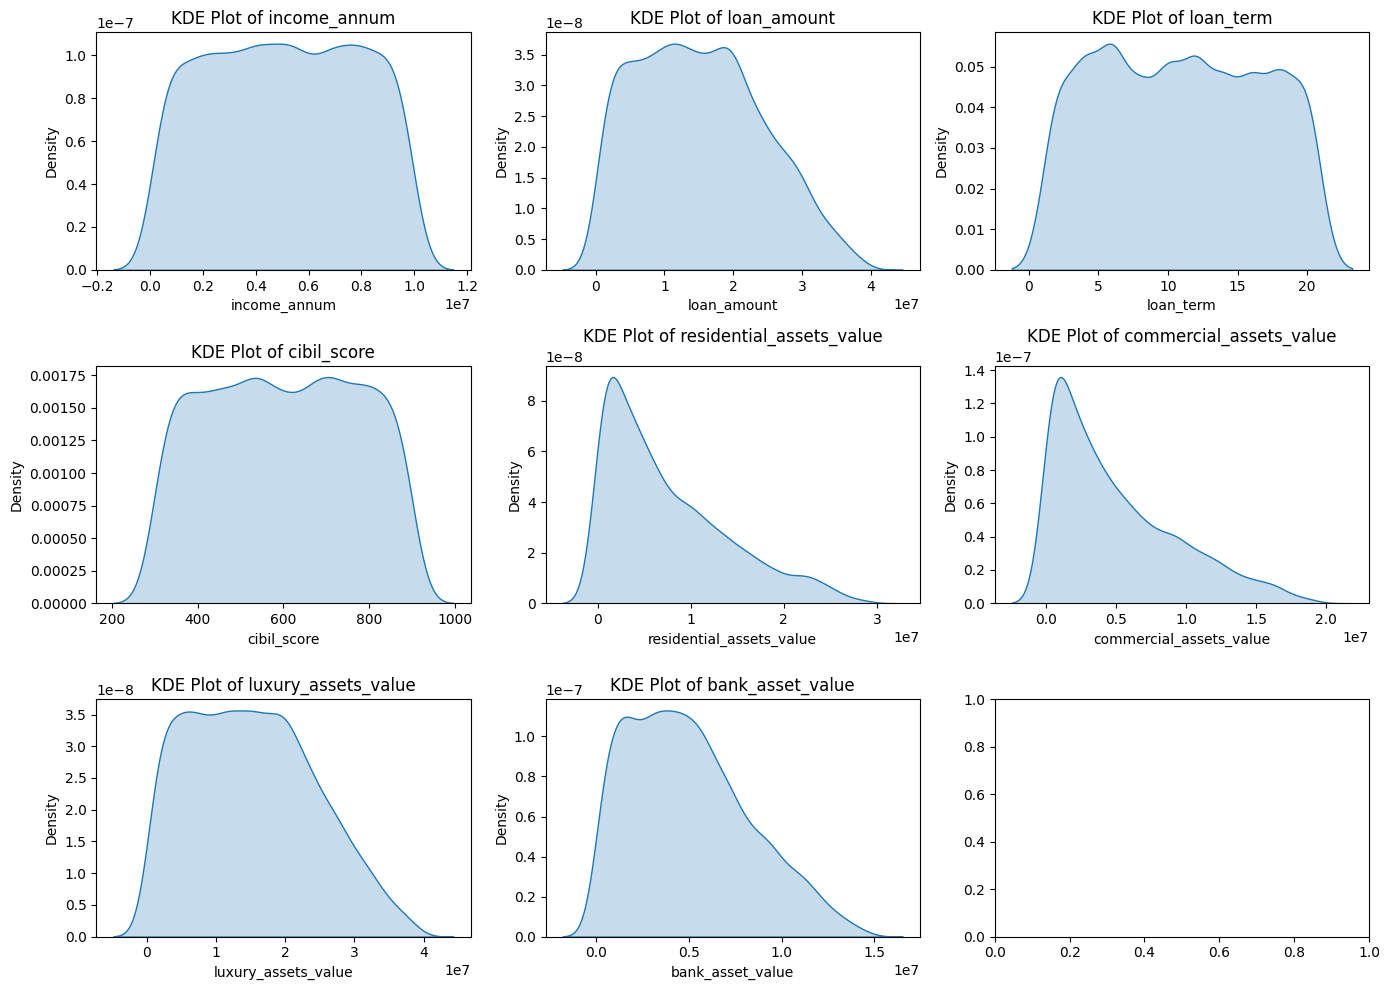

In [ ]:
# Specifying columns for plotting KDE plots
columns = ['income_annum', 'loan_amount', 'loan_term','cibil_score', 'residential_assets_value', 'commercial_assets_value',
           'luxury_assets_value', 'bank_asset_value']
# Creating subplots for KDE plots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14,10))
axes = axes.flatten()
# Iterating over columns and plotting KDE plots
for i, col in enumerate(columns):
    sns.kdeplot(df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'KDE Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
# Adjusting layout and displaying the plots
plt.tight_layout()
plt.show()

## Skewness

In [ ]:
# Selecting numerical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
# Calculating skewness of numerical columns
df[numeric_cols].skew()

no_of_dependents           -0.017971
education_Graduate         -0.008905
self_employed              -0.014529
income_annum               -0.012814
loan_amount                 0.308724
loan_term                   0.036359
cibil_score                -0.009039
residential_assets_value    0.978451
commercial_assets_value     0.957791
luxury_assets_value         0.322208
bank_asset_value            0.560725
loan_status                -0.504087
dtype: float64

## Kurtosis

In [ ]:
# Calculating kurtosis of numerical columns
df[numeric_cols].kurt()

no_of_dependents           -1.256992
education_Graduate         -2.000858
self_employed              -2.000726
income_annum               -1.182729
loan_amount                -0.743680
loan_term                  -1.220853
cibil_score                -1.185670
residential_assets_value    0.184738
commercial_assets_value     0.100813
luxury_assets_value        -0.738056
bank_asset_value           -0.397277
loan_status                -1.746715
dtype: float64

## Scaling

In [ ]:
# Importing MinMaxScaler and StandardScaler from sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Creating instances of MinMaxScaler and StandardScaler
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
# Fit and transform the data for Min-Max scaling
df[['no_of_dependents', 'loan_term','cibil_score']] = min_max_scaler.fit_transform(df[['no_of_dependents', 'loan_term','cibil_score']]) #for skewness value '>=1'
# Fit and transform the data for Standard scaling
df[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']] = std_scaler.fit_transform(df[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']])  #skewness value near to '0'

## Bivariate Analysis

## Covariance

In [ ]:
# Computing and displaying the covariance matrix of the numerical columns
cov_matrix=df[numeric_cols].cov()
df[numeric_cols].cov()

no_of_dependents  education_Graduate  self_employed  \
no_of_dependents                  0.115044            0.000457       0.000130   
education_Graduate                0.000457            0.250054      -0.005807   
self_employed                     0.000130           -0.005807       0.250045   
income_annum                      0.002465            0.005814       0.001184   
loan_amount                      -0.001142            0.005317       0.000725   
loan_term                        -0.002164           -0.001335       0.000651   
cibil_score                      -0.000975           -0.000668      -0.000699   
residential_assets_value          0.002502            0.005466       0.003072   
commercial_assets_value          -0.000519           -0.003382      -0.009001   
luxury_assets_value               0.000955            0.006237       0.002207   
bank_asset_value                  0.003787            0.004713      -0.000107   
loan_status                      -0.002979            0.001192       0.000084   

                          income_annum  loan_amount  loan_term  cibil_score  \
no_of_dependents              0.002465    -0.001142  -0.002164    -0.000975   
education_Graduate            0.005814     0.005317  -0.001335    -0.000668   
self_employed                 0.001184     0.000725   0.000651    -0.000699   
income_annum                  1.000234     0.927687   0.003644    -0.006620   
loan_amount                   0.927687     1.000234   0.002676    -0.004896   
loan_term                     0.003644     0.002676   0.100601     0.000712   
cibil_score                  -0.006620    -0.004896   0.000712     0.082590   
residential_assets_value      0.636991     0.594735   0.002543    -0.005733   
commercial_assets_value       0.640478     0.603329  -0.001738    -0.001083   
luxury_assets_value           0.929363     0.861116   0.003962    -0.008225   
bank_asset_value              0.851293     0.788306   0.005449    -0.004449   
loan_status                  -0.007366     0.007832  -0.017385     0.107375   

                          residential_assets_value  commercial_assets_value  \
no_of_dependents                          0.002502                -0.000519   
education_Graduate                        0.005466                -0.003382   
self_employed                             0.003072                -0.009001   
income_annum                              0.636991                 0.640478   
loan_amount                               0.594735                 0.603329   
loan_term                                 0.002543                -0.001738   
cibil_score                              -0.005733                -0.001083   
residential_assets_value                  1.000234                 0.414883   
commercial_assets_value                   0.414883                 1.000234   
luxury_assets_value                       0.591071                 0.591266   
bank_asset_value                          0.527541                 0.548704   
loan_status                              -0.006967                 0.003999   

                          luxury_assets_value  bank_asset_value  loan_status  
no_of_dependents                     0.000955          0.003787    -0.002979  
education_Graduate                   0.006237          0.004713     0.001192  
self_employed                        0.002207         -0.000107     0.000084  
income_annum                         0.929363          0.851293    -0.007366  
loan_amount                          0.861116          0.788306     0.007832  
loan_term                            0.003962          0.005449    -0.017385  
cibil_score                         -0.008225         -0.004449     0.107375  
residential_assets_value             0.591071          0.527541    -0.006967  
commercial_assets_value              0.591266          0.548704     0.003999  
luxury_assets_value                  1.000234          0.788702    -0.007500  
bank_asset_value                     0.788702  

## Correlation

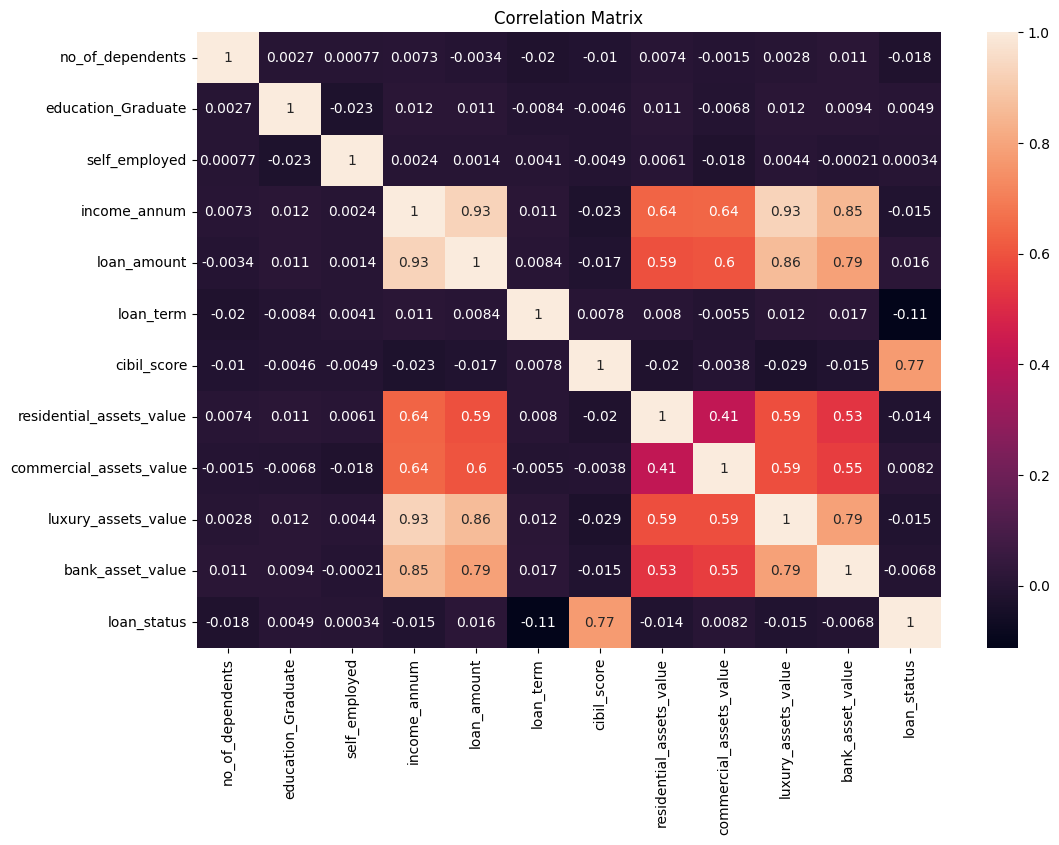

In [ ]:
# Setting the figure size
plt.figure(figsize=(12, 8))
# Creating a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True)
# Adding title to the plot
plt.title('Correlation Matrix')
# Displaying the plot
plt.show()

In [ ]:
# Computing and displaying the correlation matrix of the numerical columns
corr_matrix=df[numeric_cols].corr()
df[numeric_cols].corr()

no_of_dependents  education_Graduate  self_employed  \
no_of_dependents                  1.000000            0.002697       0.000765   
education_Graduate                0.002697            1.000000      -0.023224   
self_employed                     0.000765           -0.023224       1.000000   
income_annum                      0.007266            0.011625       0.002368   
loan_amount                      -0.003366            0.010631       0.001450   
loan_term                        -0.020111           -0.008417       0.004107   
cibil_score                      -0.009998           -0.004649      -0.004866   
residential_assets_value          0.007376            0.010930       0.006144   
commercial_assets_value          -0.001531           -0.006763      -0.017998   
luxury_assets_value               0.002817            0.012471       0.004413   
bank_asset_value                  0.011163            0.009424      -0.000215   
loan_status                      -0.018114            0.004918       0.000345   

                          income_annum  loan_amount  loan_term  cibil_score  \
no_of_dependents              0.007266    -0.003366  -0.020111    -0.009998   
education_Graduate            0.011625     0.010631  -0.008417    -0.004649   
self_employed                 0.002368     0.001450   0.004107    -0.004866   
income_annum                  1.000000     0.927470   0.011488    -0.023034   
loan_amount                   0.927470     1.000000   0.008437    -0.017035   
loan_term                     0.011488     0.008437   1.000000     0.007810   
cibil_score                  -0.023034    -0.017035   0.007810     1.000000   
residential_assets_value      0.636841     0.594596   0.008016    -0.019947   
commercial_assets_value       0.640328     0.603188  -0.005478    -0.003769   
luxury_assets_value           0.929145     0.860914   0.012490    -0.028618   
bank_asset_value              0.851093     0.788122   0.017177    -0.015478   
loan_status                  -0.015189     0.016150  -0.113036     0.770518   

                          residential_assets_value  commercial_assets_value  \
no_of_dependents                          0.007376                -0.001531   
education_Graduate                        0.010930                -0.006763   
self_employed                             0.006144                -0.017998   
income_annum                              0.636841                 0.640328   
loan_amount                               0.594596                 0.603188   
loan_term                                 0.008016                -0.005478   
cibil_score                              -0.019947                -0.003769   
residential_assets_value                  1.000000                 0.414786   
commercial_assets_value                   0.414786                 1.000000   
luxury_assets_value                       0.590932                 0.591128   
bank_asset_value                          0.527418                 0.548576   
loan_status                              -0.014367                 0.008246   

                          luxury_assets_value  bank_asset_value  loan_status  
no_of_dependents                     0.002817          0.011163    -0.018114  
education_Graduate                   0.012471          0.009424     0.004918  
self_employed                        0.004413         -0.000215     0.000345  
income_annum                         0.929145          0.851093    -0.015189  
loan_amount                          0.860914          0.788122     0.016150  
loan_term                            0.012490          0.017177    -0.113036  
cibil_score                         -0.028618         -0.015478     0.770518  
residential_assets_value             0.590932          0.527418    -0.014367  
commercial_assets_value              0.591128          0.548576     0.008246  
luxury_assets_value                  1.000000          0.788517    -0.015465  
bank_asset_value                     0.788517  

<Figure size 1000x1000 with 0 Axes>

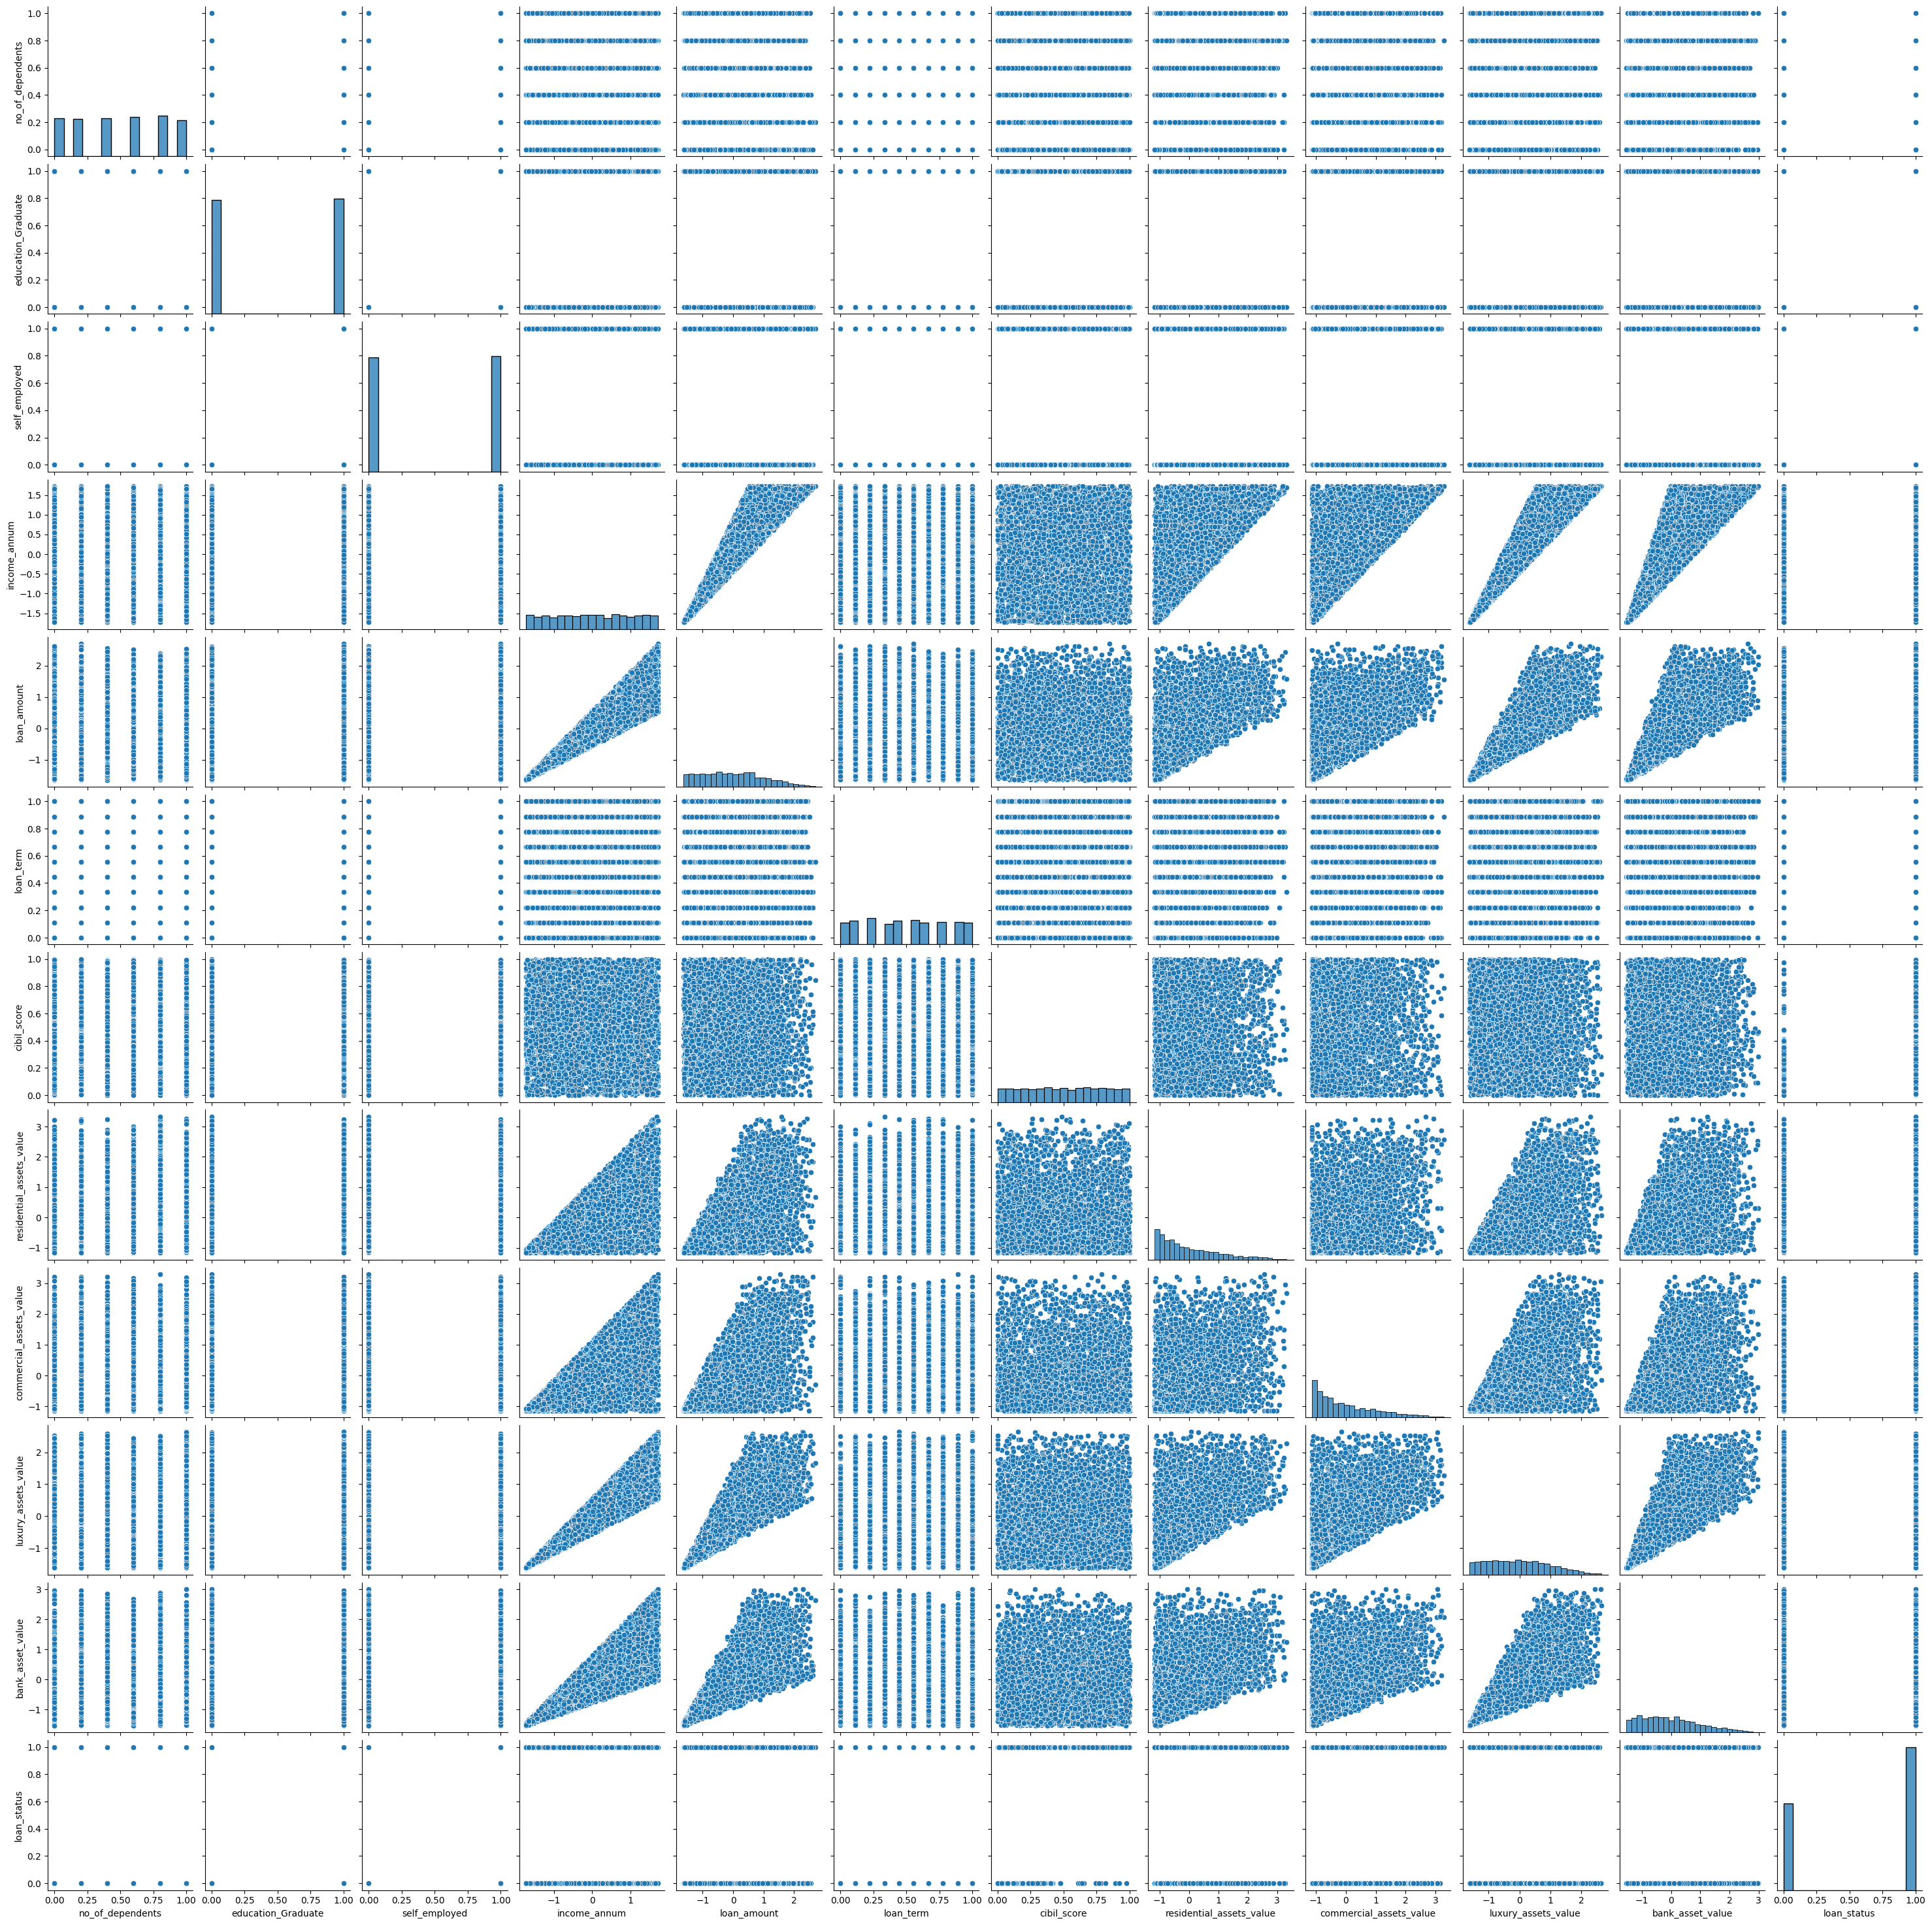

In [ ]:
# Setting the figure size
plt.figure(figsize=(10, 10))
# Creating a pairplot of the DataFrame
sns.pairplot(df)
# Displaying the plot
plt.show()

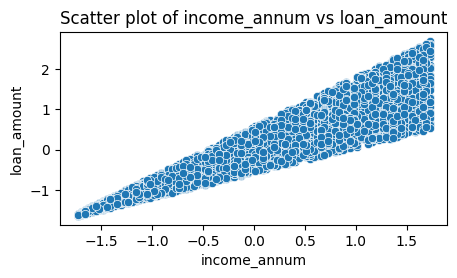

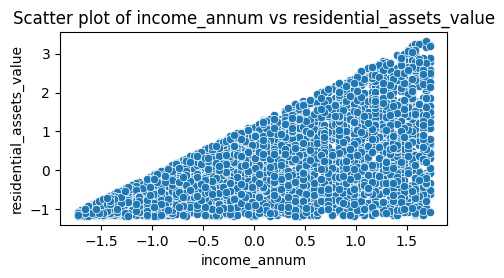

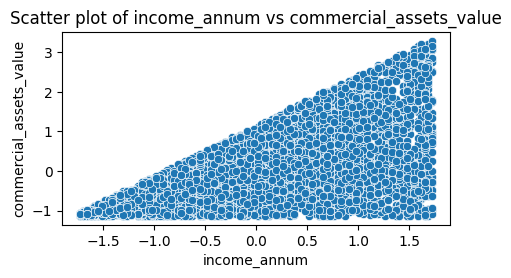

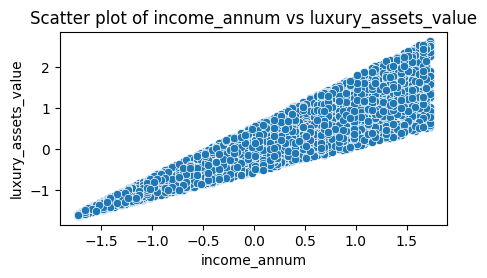

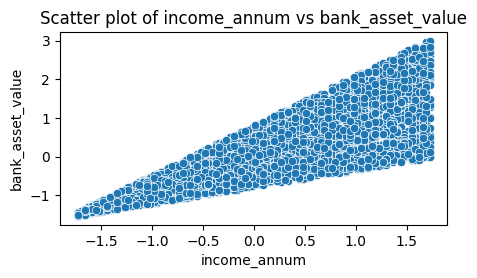

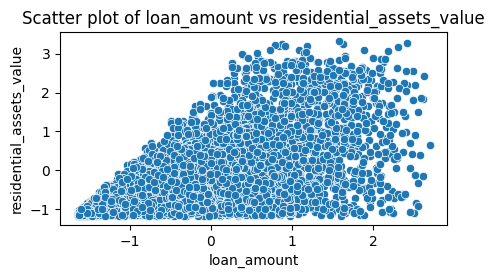

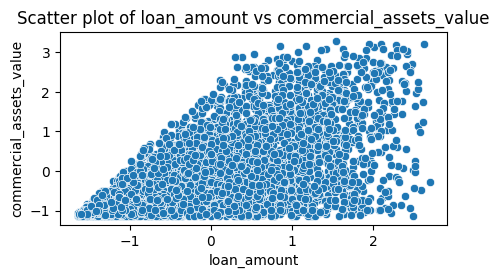

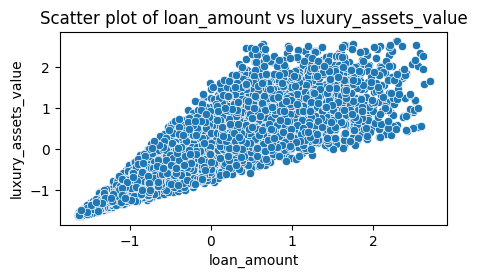

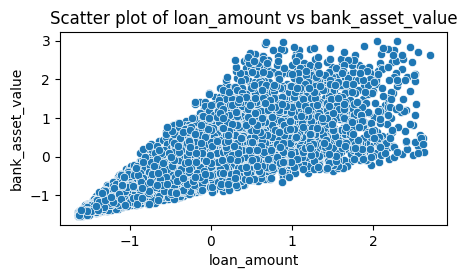

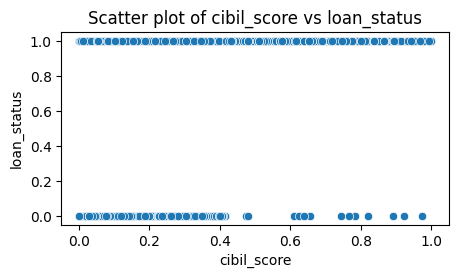

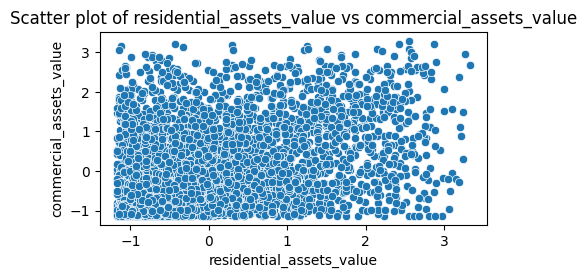

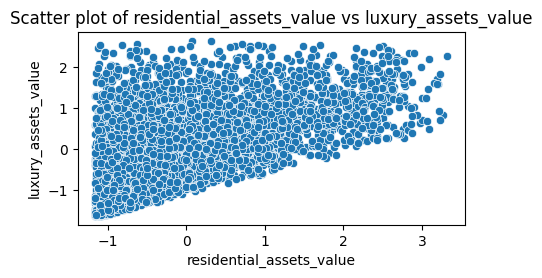

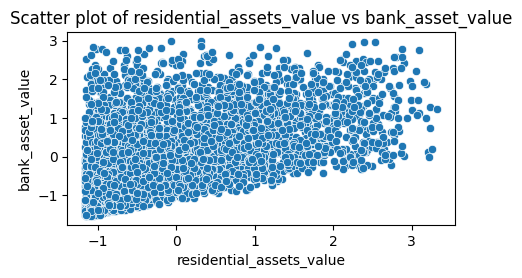

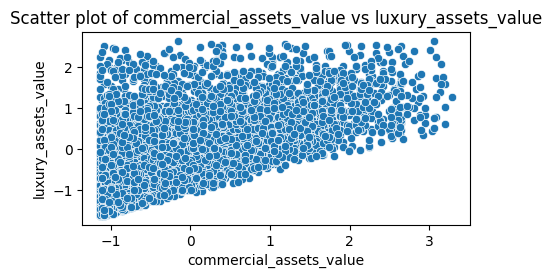

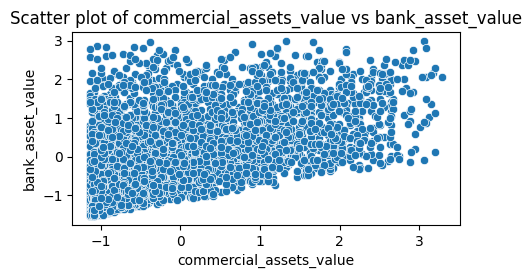

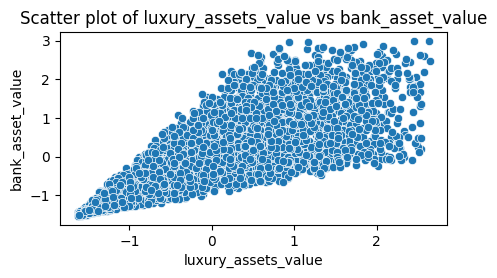

In [ ]:
# Compute the correlation matrix
corr_matrix = df.corr()
# Find pairs of variables with correlation greater than 0.3
pairs = [(i, j) for i in range(corr_matrix.shape[0]) for j in range(i+1, corr_matrix.shape[0]) if abs(corr_matrix.iloc[i, j]) > 0.3]
# Create scatter plots for each pair of variables
for pair in pairs:
    plt.figure(figsize=(5, 2.5))
    sns.scatterplot(data=df, x=df.columns[pair[0]], y=df.columns[pair[1]])
    plt.title(f'Scatter plot of {df.columns[pair[0]]} vs {df.columns[pair[1]]}')
    plt.show()

<Figure size 500x500 with 0 Axes>

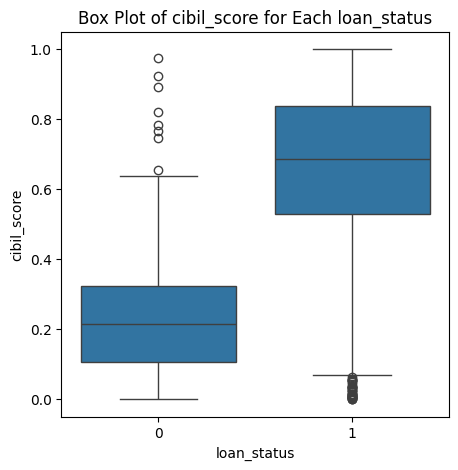

In [ ]:
# Setting the figure size
plt.figure(figsize=(5, 5))
# Creating a box plot
plt.figure(figsize=(5,5))
# Adding title and labels
sns.boxplot(x='loan_status', y='cibil_score', data=df)
plt.title('Box Plot of cibil_score for Each loan_status')
plt.xlabel('loan_status')
plt.ylabel('cibil_score')
# Displaying the plot
plt.show()

In [ ]:
# Displaying the first 5 rows of the DataFrame
df.head()

no_of_dependents  education_Graduate  self_employed  income_annum  \
0               0.4                   1              0      1.617979   
1               0.0                   0              1     -0.341750   
2               0.6                   1              0      1.439822   
3               0.6                   1              0      1.119139   
4               1.0                   0              1      1.689242   

   loan_amount  loan_term  cibil_score  residential_assets_value  \
0     1.633052   0.555556     0.796667                 -0.780058   
1    -0.324414   0.333333     0.195000                 -0.733924   
2     1.610933   1.000000     0.343333                 -0.057300   
3     1.721525   0.333333     0.278333                  1.649637   
4     1.002681   1.000000     0.136667                  0.757724   

   commercial_assets_value  luxury_assets_value  bank_asset_value  loan_status  
0                 2.877289             0.832028          0.930304            1  
1                -0.631921            -0.694993         -0.515936            0  
2                -0.107818             1.996520          2.407316            0  
3                -0.381263             0.897943          0.899533            0  
4                 0.735304             1.568075          0.007172            0

In [ ]:
# Divide train test split
from sklearn.model_selection import train_test_split
# Divide target and independent variables
x = df.drop(['loan_status'],axis=1) # axis = 1 refers to columns
y = df['loan_status']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [ ]:
x_train.shape # Print x_train

(3415, 11)

In [ ]:
y_train.shape # Print y_train

(3415,)

In [ ]:
x_test.shape # Print x_test

(854, 11)

In [ ]:
y_test.shape # Print y_test

(854,)

In [ ]:
# Import MinMaxScaler and StandardScaler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score

# Logistic Regression

### Min-Max Scaling

In [ ]:
x_train_scaled_1 = min_max_scaler.fit_transform(x_train)

x_test_scaled_1 = min_max_scaler.fit_transform(x_test)

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled_1, y_train)

y_pred_1 = log_reg.predict(x_test_scaled_1)

In [ ]:
# Get accuracy
accuracy_1 = accuracy_score(y_test, y_pred_1)
classification_rep_1 = classification_report(y_test, y_pred_1)
conf_matrix_1 = confusion_matrix(y_test, y_pred_1)
# Get recall
recall_1 = recall_score(y_test, y_pred_1)

In [ ]:
print(f"Accuracy: {accuracy_1:.2f}")
print("Classification Report:")
print(classification_rep_1)
print("Confusion Matrix:")
print(conf_matrix_1)
print(f"Recall: {recall_1:.2f}")

Accuracy: 0.91
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       318
           1       0.92      0.93      0.93       536

    accuracy                           0.91       854
   macro avg       0.91      0.90      0.90       854
weighted avg       0.91      0.91      0.91       854

Confusion Matrix:
[[276  42]
 [ 35 501]]
Recall: 0.93


### Individual Scaling

In [ ]:
x_train_copy_2 = x_train.copy()
x_test_copy_2 = x_test.copy()


In [ ]:
x_train_copy_2[['no_of_dependents', 'loan_term','cibil_score']] = min_max_scaler.fit_transform(x_train_copy_2[['no_of_dependents', 'loan_term','cibil_score']]) #for skewness value '>=1'
x_train_copy_2[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']] = std_scaler.fit_transform(x_train_copy_2[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']])  #skewness value near to '0'

In [ ]:
x_test_copy_2[['no_of_dependents', 'loan_term','cibil_score']] = min_max_scaler.fit_transform(x_test_copy_2[['no_of_dependents', 'loan_term','cibil_score']]) #for skewness value '>=1'
x_test_copy_2[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']] = std_scaler.fit_transform(x_test_copy_2[['loan_amount', 'income_annum','residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']])  #skewness value near to '0'

In [ ]:
log_reg_2 = LogisticRegression()

log_reg_2.fit(x_train_copy_2, y_train)

y_pred_2 = log_reg_2.predict(x_test_copy_2)

In [ ]:
accuracy_2 = accuracy_score(y_test, y_pred_2)
classification_rep_2 = classification_report(y_test, y_pred_2)
conf_matrix_2 = confusion_matrix(y_test, y_pred_2)
recall_2 = recall_score(y_test, y_pred_2)

In [ ]:
print(f"Accuracy: {accuracy_2:.2f}")
print("Classification Report:")
print(classification_rep_2)
print("Confusion Matrix:")
print(conf_matrix_2)
print(f"Recall: {recall_2:.2f}")

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       318
           1       0.92      0.93      0.92       536

    accuracy                           0.90       854
   macro avg       0.90      0.89      0.90       854
weighted avg       0.90      0.90      0.90       854

Confusion Matrix:
[[273  45]
 [ 37 499]]
Recall: 0.93


### Standard Scaling

In [ ]:
x_train_scaled_3 = std_scaler.fit_transform(x_train)

x_test_scaled_3 = std_scaler.fit_transform(x_test)

In [ ]:
log_reg = LogisticRegression()

log_reg.fit(x_train_scaled_3, y_train)

y_pred_3 = log_reg.predict(x_test_scaled_3)

In [ ]:
accuracy_3 = accuracy_score(y_test, y_pred_3)
classification_rep_3 = classification_report(y_test, y_pred_3)
conf_matrix_3 = confusion_matrix(y_test, y_pred_3)
recall_3 = recall_score(y_test, y_pred_3)

In [ ]:
print(f"Accuracy: {accuracy_3:.2f}")
print("Classification Report:")
print(classification_rep_3)
print("Confusion Matrix:")
print(conf_matrix_3)
print(f"Recall: {recall_3:.2f}")

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       318
           1       0.91      0.93      0.92       536

    accuracy                           0.90       854
   macro avg       0.89      0.89      0.89       854
weighted avg       0.90      0.90      0.90       854

Confusion Matrix:
[[270  48]
 [ 38 498]]
Recall: 0.93


# Random Forest Classifier

### MMS

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

clf_1 = RandomForestClassifier(n_estimators=100, random_state=42)

clf_1.fit(x_train_scaled_1, y_train)

y_pred_4 = clf_1.predict(x_test_scaled_1)

accuracy_4 = accuracy_score(y_test, y_pred_4)
print(f"Accuracy: {accuracy_4:.2f}")

conf_matrix_4 = confusion_matrix(y_test, y_pred_4)
print("\nConfusion Matrix:")
print(conf_matrix_4)

class_report_4 = classification_report(y_test, y_pred_4)
print("\nClassification Report:")
print(class_report_4)
recall_4 = recall_score(y_test, y_pred_4)
print(f"Recall: {recall_4:.2f}")

Accuracy: 0.98

Confusion Matrix:
[[305  13]
 [  7 529]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Recall: 0.99


### Individual

In [ ]:
clf_2 = RandomForestClassifier(n_estimators=100, random_state=42)

clf_2.fit(x_train_copy_2, y_train)

y_pred_5 = clf_2.predict(x_test_copy_2)

accuracy_5 = accuracy_score(y_test, y_pred_5)
print(f"Accuracy: {accuracy_5:.2f}")

conf_matrix_5 = confusion_matrix(y_test, y_pred_5)
print("\nConfusion Matrix:")
print(conf_matrix_5)

class_report_5 = classification_report(y_test, y_pred_5)
print("\nClassification Report:")
print(class_report_5)

recall_5 = recall_score(y_test, y_pred_5)
print(f"Recall: {recall_5:.2f}")

Accuracy: 0.98

Confusion Matrix:
[[306  12]
 [  8 528]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.97      0.97       854
weighted avg       0.98      0.98      0.98       854

Recall: 0.99


### SS

In [ ]:
clf_3 = RandomForestClassifier(n_estimators=100, random_state=42)

clf_3.fit(x_train_scaled_3, y_train)

y_pred_6 = clf_3.predict(x_test_scaled_3)

accuracy_6 = accuracy_score(y_test, y_pred_6)
print(f"Accuracy: {accuracy_6:.2f}")

conf_matrix_6 = confusion_matrix(y_test, y_pred_6)
print("\nConfusion Matrix:")
print(conf_matrix_6)

class_report_6 = classification_report(y_test, y_pred_6)
print("\nClassification Report:")
print(class_report_6)

recall_6 = recall_score(y_test, y_pred_6)
print(f"Recall: {recall_6:.2f}")

Accuracy: 0.97

Confusion Matrix:
[[300  18]
 [  8 528]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       318
           1       0.97      0.99      0.98       536

    accuracy                           0.97       854
   macro avg       0.97      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854

Recall: 0.99
